# Jacobs University Bremen
# Machine Learning - Spring 2022

## Homework 2 (Programming)
### Topic: Visualization Techniques

#### Tools/Libraries to choose from:
    Matplotlib (Python)
    Matplotlib (C++ Wrapper)
    Gnuplot

#### Questions:
a)  Scatter plot.
<br><emsp>
i)  Generate a random set of two-dimensional points.
<br><nbsp>
ii) Plot set data as a scatter plot (Useful later).
<br><br>
b)  Plot the density of the 2D Gaussian distribution $N(\mu;\sum)$, with $\mu = \begin{pmatrix} 0\\1 \end{pmatrix}$ and $\begin{pmatrix} 2 & 1 \\ 2 & 1 \end{pmatrix}$.

In [26]:
## importing libraries

import numpy as np
import matplotlib.pyplot as plot

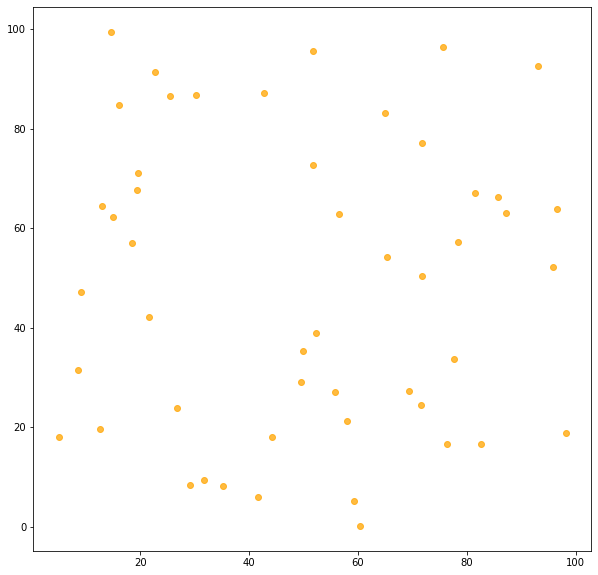

In [27]:
# generating a 2D vector of random numbers in the range of 0 to 100
dataset = ( np.random.rand (50, 2) ) * 100

# transposing the vector and assign the rows to the corresponding x & y vectors
dataset_x, dataset_y = dataset.T

# customize the size of the output graph to 10 by 10
plot.figure(figsize = (10, 10))

# set 5 random colours
# colours = np.random.rand(5)
# preparing the scatter plot
plot.scatter(dataset_x, dataset_y, c='#FFA500', alpha=0.75)

# show plot
plot.show()

## Part 2

In [29]:
## importing libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# import scipy.stats as st
# from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D


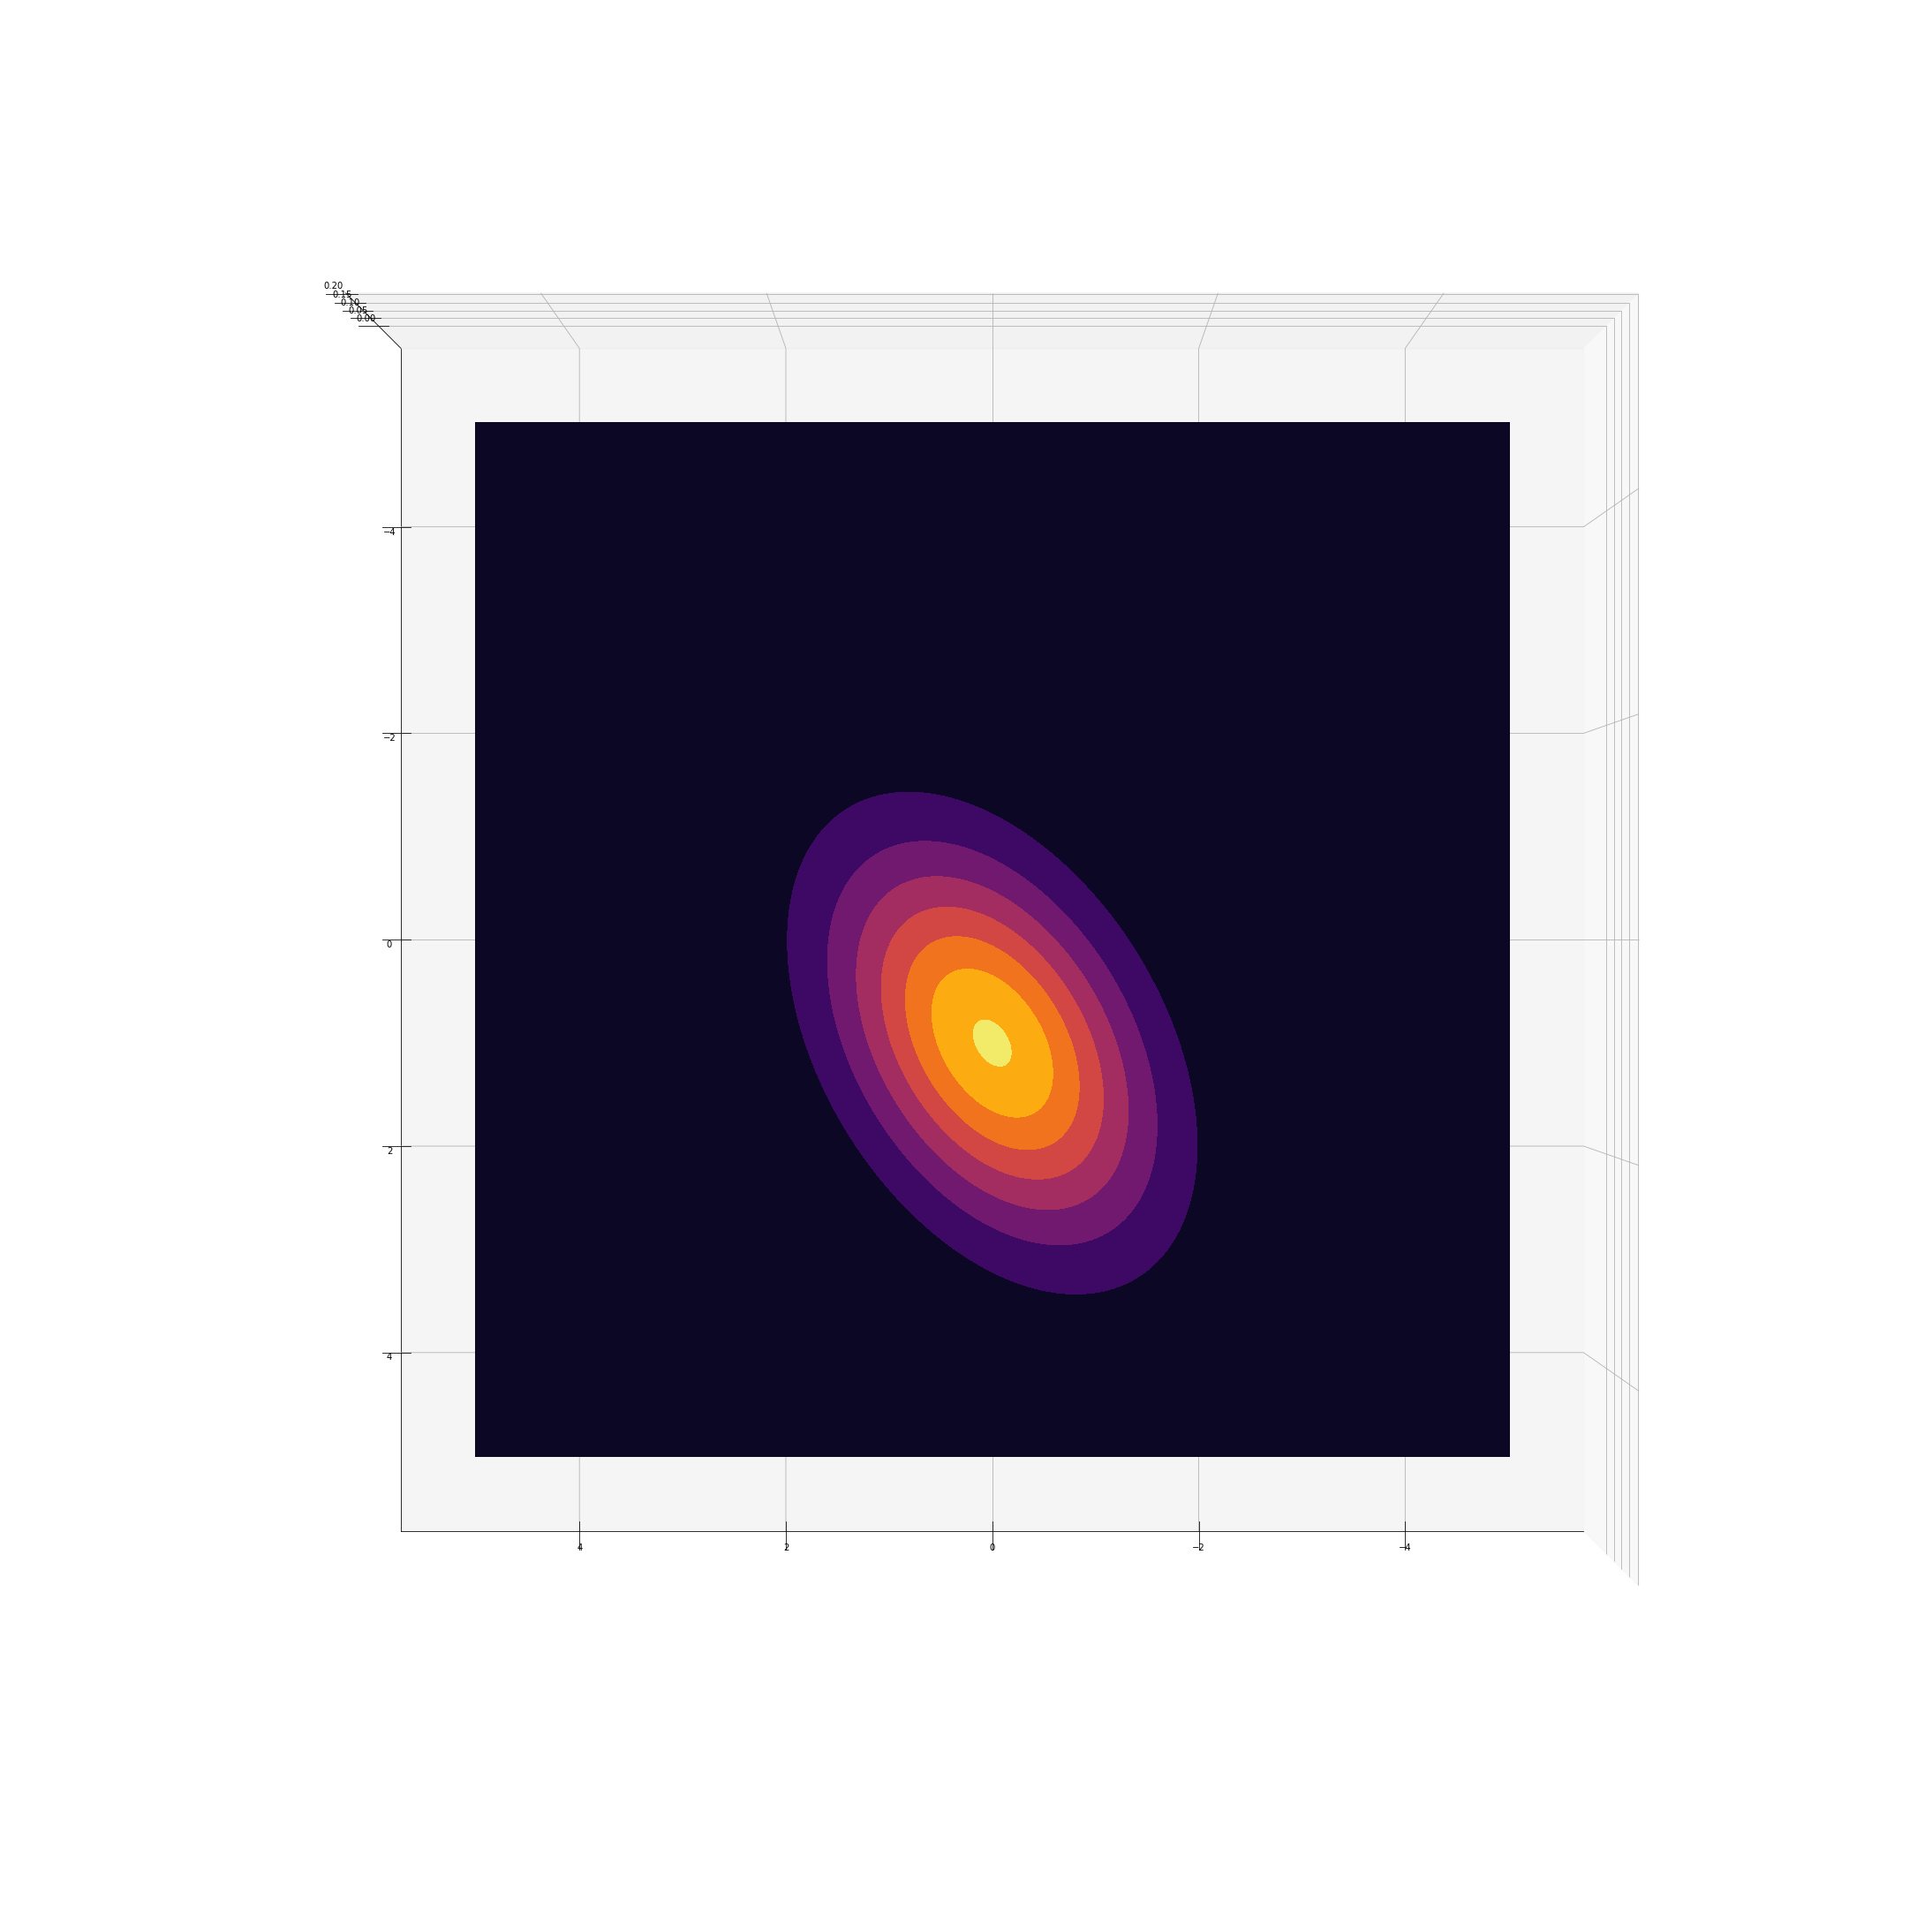

In [30]:
# Our 2-dimensional distribution will be over variables X and Y
N = 500
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu)
        # in a vectorized way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure(figsize=(40,40))
axis = fig.gca(projection='3d')
cset = axis.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.inferno)

# Adjust the limits, ticks and view angle
axis.set_zlim(-0.15,0.2)
axis.set_zticks(np.linspace(0,0.2,5))
axis.view_init(90,90)

plt.show()